# Pokemon

Analysis of Generations 1 to 6

In [1]:
import csv
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from math import pi

# Embeds graphs in Jupyter notebook (instead of pop-ups)
%matplotlib inline

In [2]:
main = pd.read_csv("./pokemon.csv")

# Data summary
# main.isna().sum()
main.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


## Type
### Number of Pokemon of Each Type
Find the number of pokemon with each primary/secondary type

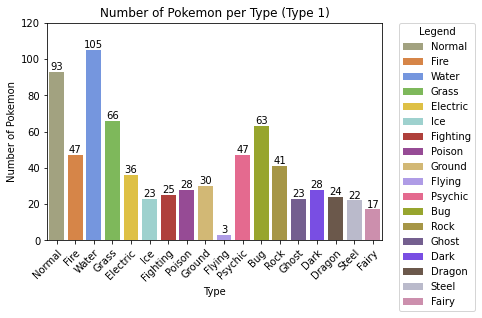

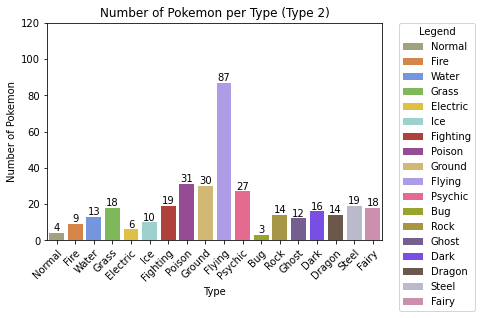

In [3]:
# List of types, in order
TYPE_LIST = [
    'Normal',
    'Fire',
    'Water',
    'Grass',
    'Electric',
    'Ice',
    'Fighting',
    'Poison',
    'Ground',
    'Flying',
    'Psychic',
    'Bug',
    'Rock',
    'Ghost',
    'Dark',
    'Dragon',
    'Steel',
    'Fairy'
]

TYPE_PALETTE = [
    '#A8A77A',
    '#EE8130',
    '#6390F0',
    '#7AC74C',
    '#F7D02C',
    '#96D9D6',
    '#C22E28',
    '#A33EA1',
    '#E2BF65',
    '#A98FF3',
    '#F95587',
    '#A6B91A',
    '#B6A136',
    '#735797',
    '#6F35FC',
    '#705746',
    '#B7B7CE',
    '#D685AD'
];

# Set type columns to follow order
main["Type 1"] = pd.Categorical(main["Type 1"], TYPE_LIST)
main["Type 2"] = pd.Categorical(main["Type 2"], TYPE_LIST)

# Create empty dataframe
num_types = pd.DataFrame(index=TYPE_LIST)

for type in ["Type 1", "Type 2"]:
#     Count number of pokemon per type
    num_types[type] = main[[type, "#"]] \
        .drop_duplicates("#") \
        .groupby(type) \
        .count()
    
#     Create barplot
    ax = sns.barplot(
        x=num_types.index,
        y=type,
        data=num_types,
        ci=None,
        palette=TYPE_PALETTE
    )
    
#     Set labels for x-axis, y-axis and each bar
    ax.set(xlabel='Type', ylabel='Number of Pokemon')
    for container in ax.containers:
        ax.bar_label(container)
        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            ha="right",
            rotation_mode="anchor"
        )
        
#         Set y-axis limit
        plt.ylim(0, 120)
        
#         Set title and legend
    ax.set_title(f"Number of Pokemon per Type ({type})");
    ax.legend(
        title="Legend",
        labels=TYPE_LIST,
        handles=ax.patches,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0
    )
    
    plt.show()

Percentages are weighted, i.e.
- If a pokemon has 1 type, value of 1 will be added to that type's count/tally
- If a pokemon has 2 types, value of0.5 will be added to each type's count/tally

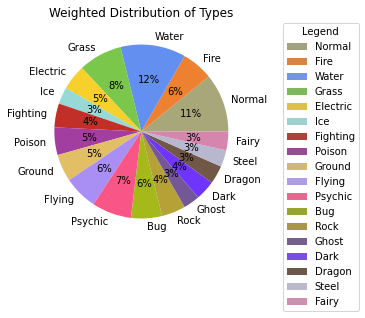

In [4]:
# Ignore different forms of same pokemon
main_no_duplicates = main[["#", "Type 1", "Type 2"]].drop_duplicates("#")

weighted_num_types = pd.DataFrame(index=TYPE_LIST)
# Find pokemon with two types, then add 0.5 to each type
# Find pokemon with one type, then add 1 to that type
weighted_num_types["Total"] = main_no_duplicates.dropna()[["#", "Type 1"]].groupby("Type 1").count()/2 \
    + main_no_duplicates.dropna()[["#", "Type 2"]].groupby("Type 2").count()/2 \
    + main_no_duplicates[main_no_duplicates["Type 2"].isna()][["#", "Type 1"]].groupby("Type 1").count()

plt.pie(
    weighted_num_types["Total"],
    labels=TYPE_LIST,
    colors=TYPE_PALETTE,
    autopct='%.0f%%',
#     explode=np.full((1, len(TYPE_LIST)), 0.2)[0]
)
plt.title("Weighted Distribution of Types")
plt.legend(
    title="Legend",
    labels=TYPE_LIST,
    handles=ax.patches,
    bbox_to_anchor=(1.15, 1),
    loc='upper left',
    borderaxespad=0
)
plt.show()

### Stats
Stat distribution of each type, with the following conditions:
- Ignores second type
- Takes all pokemon forms into account
- Takes all evolutions into account
- Excludes legendaries

In [5]:
stats_by_type = main.drop((main[main["Legendary"] == True].index) | (main[main["Name"].str.contains(r'\w+Mega \w+')].index)) \
    .drop(["Legendary", "Generation", "Type 2", "#", "Name"], axis=1) \
    .groupby("Type 1", as_index=False) \
    .mean() \
    .melt('Type 1', var_name='Stat', value_name='Count') \
    .rename(columns={'Type 1':'Type'})

C:\Users\LEPK\AppData\Local\Temp/ipykernel_16116/3708384563.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  stats_by_type = main.drop((main[main["Legendary"] == True].index) | (main[main["Name"].str.contains(r'\w+Mega \w+')].index)) \


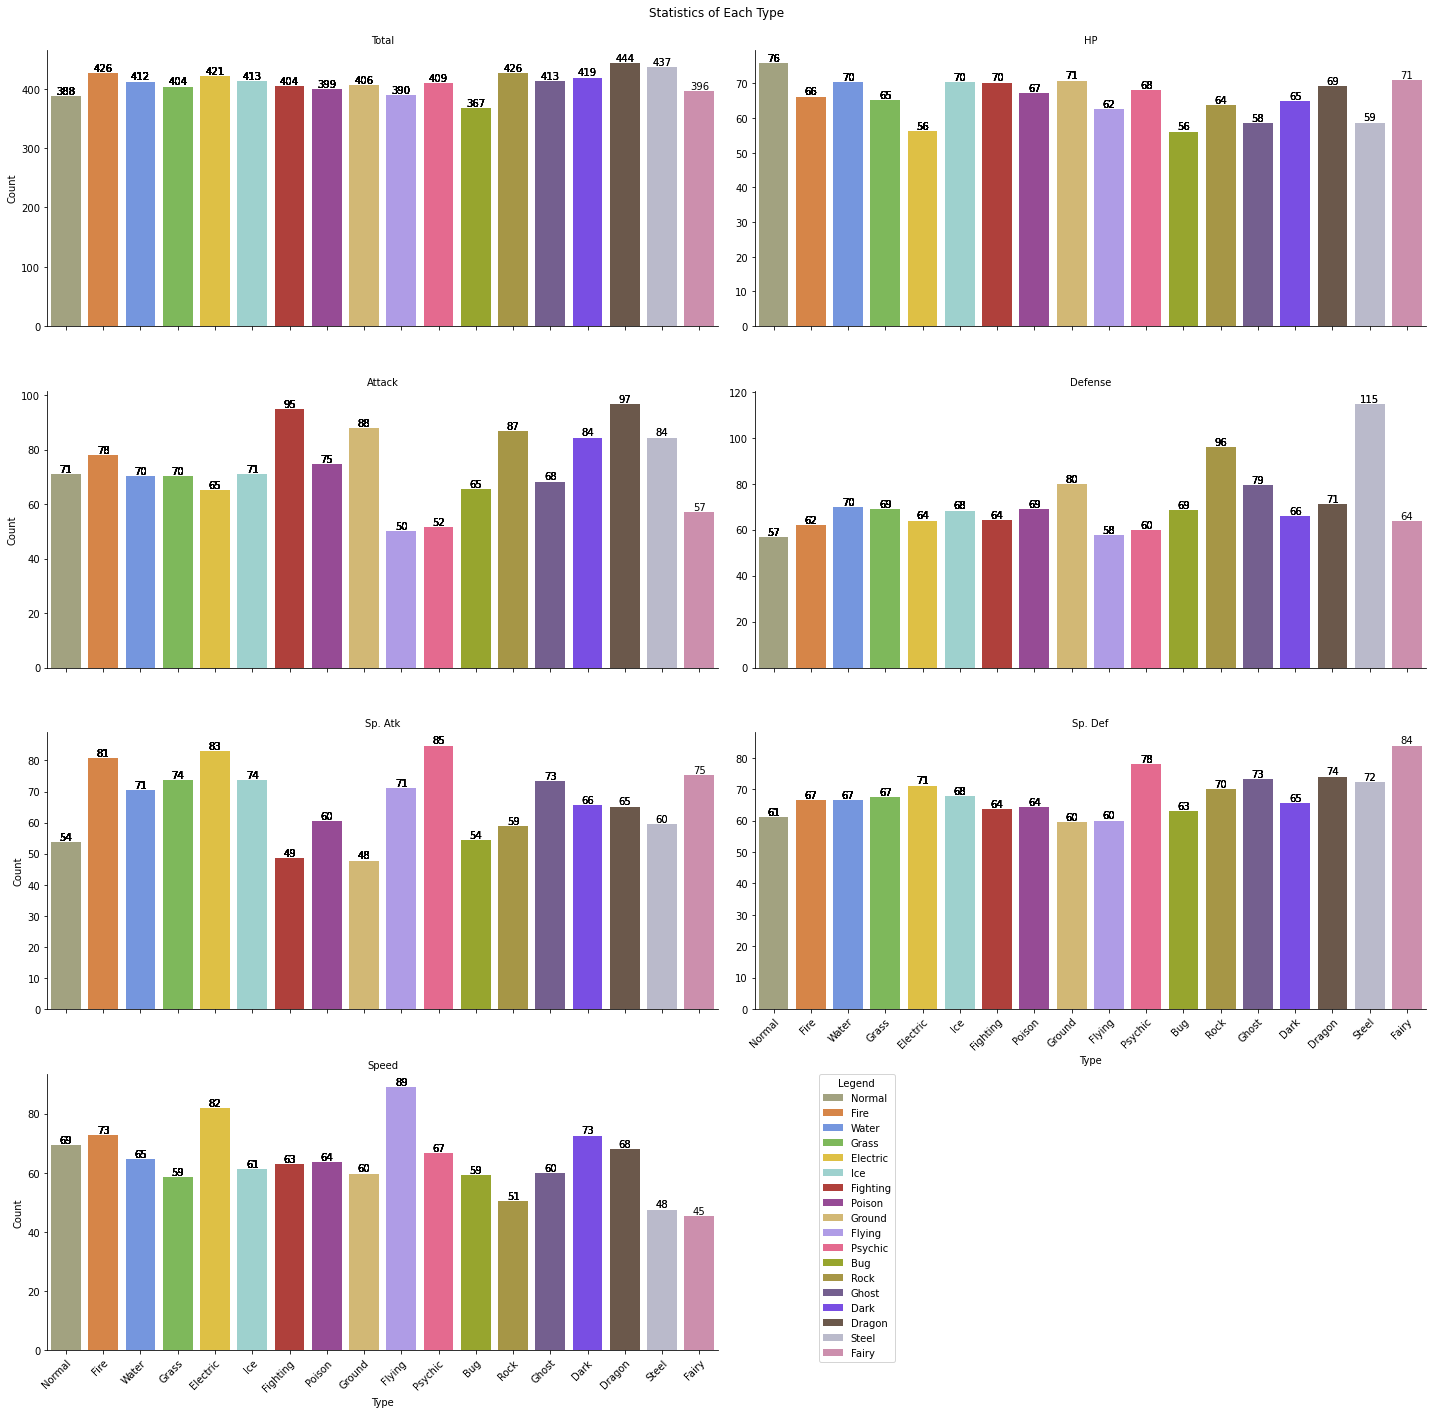

In [6]:
# Create FacetGrid
g = sns.FacetGrid(
    stats_by_type,
    col="Stat",
    hue="Type",
    height=5,
    aspect=2.0,
    sharey=False,
    col_wrap=2
)

# Create map function
def f(x,y, **kwargs):
    ax = sns.barplot(x=x, y=y, **kwargs)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f")
        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            ha="right",
            rotation_mode="anchor"
        )

# Plot graph using map function
g.map(f, "Type", "Count", ci=None, palette=TYPE_PALETTE)

# Set legend and titles
plt.legend(
    title="Legend",
    labels=TYPE_LIST,
    handles=ax.patches,
    bbox_to_anchor=(1.15, 1),
    loc='upper left',
    borderaxespad=0
)
g.set_titles("{col_name}")
g.fig.suptitle("Statistics of Each Type");

# Adjust spacing for titles and axes
g.fig.subplots_adjust(top=0.95)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

## Classes
### Stat differences
Comparison between:
- Regular
- Mega
- Legendary

In [7]:
class_df = pd.DataFrame()

# Filter by regular/main/legendary
# Drop unnecessary columns
# Get mean
class_df["Regular"] = main.drop((main[main["Legendary"] == True].index).union(main[main["Name"].str.contains(r'\w+Mega \w+')].index)) \
    .drop(["Legendary", "Generation", "Type 1", "Type 2", "#", "Name"], axis=1) \
    .mean() \
    .astype(int)
class_df["Mega"] = main[main["Name"].str.contains(r'\w+Mega \w+')] \
    .drop(["Legendary", "Generation", "Type 1", "Type 2", "#", "Name"], axis=1) \
    .mean() \
    .astype(int)
class_df["Legendary"] = main[main["Legendary"] == True] \
    .drop(["Legendary", "Generation", "Type 1", "Type 2", "#", "Name"], axis=1) \
    .mean() \
    .astype(int)

# Reshape dataframe
class_df = class_df.reset_index() \
    .melt("index", var_name='Class', value_name='Value') \
    .rename(columns={'index':'Stat'})

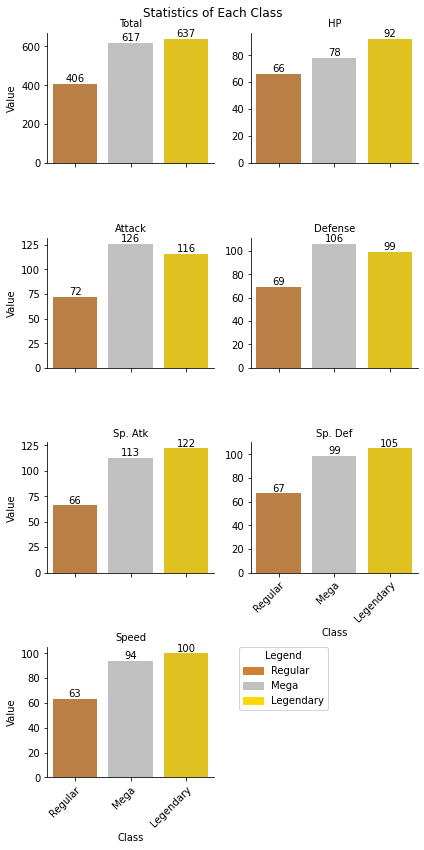

In [8]:
# Create FacetGrid
g = sns.FacetGrid(
    class_df,
    col="Stat",
    height=3,
    sharey=False,
    col_wrap=2
)

# Create map function
def f(x,y, **kwargs):
    ax = sns.barplot(x=x, y=y, **kwargs)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f")
        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            ha="right",
            rotation_mode="anchor"
        )

# Plot graph using map function
g.map(f, "Class", "Value", ci=None, palette=["#CD7F32", "#C0C0C0", "#FFD700"])

# Set legend and titles
regular_legend = mpatches.Patch(color="#CD7F32", label='Regular')
mega_legend = mpatches.Patch(color="#C0C0C0", label='Mega')
legendary_legend = mpatches.Patch(color="#FFD700", label='Legendary')
plt.legend(
    title="Legend",
#     labels=["Regular", "Mega", "Legendary"],
    handles=[regular_legend, mega_legend, legendary_legend],
    bbox_to_anchor=(1.15, 1),
    loc='upper left',
    borderaxespad=0
)
g.set_titles("{col_name}")
g.fig.suptitle("Statistics of Each Class");

# Adjust spacing for titles and axes
g.fig.subplots_adjust(top=0.95)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

### Stat distribution
- Mega-Legendary
- Mega
- Legendary
- Regular

In [9]:
# Filter by class
# Sum to create Offence and Defence columns (Total provided)
# Add class to Class column in stats_by_class
# Concatenate data together
stats_by_class = pd.DataFrame()
for (drop, class_name) in zip(
    [
        (main[main["Legendary"] == True].index).union(main[main["Name"].str.contains(r'\w+Mega \w+')].index),
        (main[main["Legendary"] == True].index).union(main[~main["Name"].str.contains(r'\w+Mega \w+')].index),
        (main[main["Legendary"] == False].index).union(main[main["Name"].str.contains(r'\w+Mega \w+')].index),
        (main[main["Legendary"] == False].index).union(main[~main["Name"].str.contains(r'\w+Mega \w+')].index)
    ],
    [
        "Regular",
        "Mega",
        "Legendary",
        "Mega-Legendary"
    ]
):
    stats_by_class = pd.concat([
        stats_by_class,
        pd.DataFrame(
            data={
                "Total": main.drop(drop)["Total"],
                "Offence": main.drop(drop)[["Attack", "Sp. Atk", "Speed"]].sum(axis=1),
                "Defence": main.drop(drop)[["Defense", "Sp. Def", "HP"]].sum(axis=1),
                "Class": class_name
            }
        )
    ])

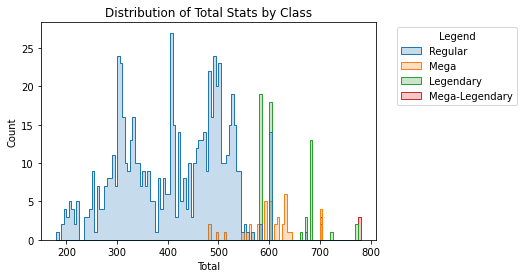

In [10]:
ax = sns.histplot(
    data=stats_by_class,
    x="Total",
    hue="Class",
    binwidth=5,
    element="step"
)

# Set legend and title
ax.legend(
    title="Legend",
    handles=ax.legend_.legendHandles,
    labels=[t.get_text() for t in ax.legend_.texts],
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)
plt.title("Distribution of Total Stats by Class")

plt.show()

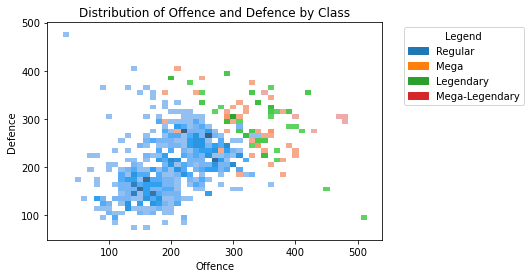

In [11]:
ax = sns.histplot(
    data=stats_by_class,
    x="Offence",
    y="Defence",
    hue="Class",
    binwidth=10,
)

# Set legend and title
ax.legend(
    title="Legend",
    handles=ax.legend_.legendHandles,
    labels=[t.get_text() for t in ax.legend_.texts],
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)
plt.title("Distribution of Offence and Defence by Class")

plt.show()

### Best Legendaries
- Highest total (780)
    - Mega Mewtwo X
    - Mega Mewtwo Y
    - Mega Rayquaza
- Highest offence (Atk + Sp. Atk + Spd)
    - Deoxys (Attack Form) - 510
    - Mega Mewtwo Y - 484
    - Mega Rayquaza - 475
- Highest defence (Def + Sp. Def + HP)
    - Giratina (Altered Form) - 390
    - Lugia - 390

In [12]:
legendary_ranking = main[main["Legendary"] == True] \
    .drop(["Legendary", "Type 1", "Type 2", "#"], axis=1) \
    .reset_index(drop=True)

legendary_ranking["Offence"] = legendary_ranking["Attack"] + legendary_ranking["Sp. Atk"] + legendary_ranking["Speed"]
legendary_ranking["Defence"] = legendary_ranking["Defense"] + legendary_ranking["Sp. Def"] + legendary_ranking["HP"]

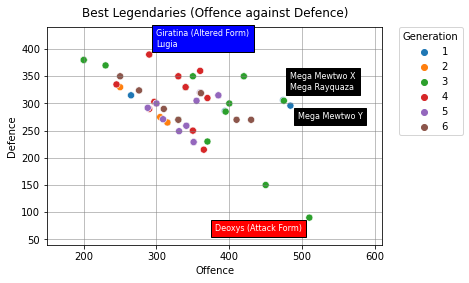

In [13]:
ax = sns.scatterplot(
    data=legendary_ranking, 
    x="Offence", 
    y="Defence", 
    hue="Generation", 
    s=50, 
    palette="tab10"
)
ax.grid(b=True, which='major', color='grey', linewidth=0.5)

# Label individual points
def label_point(name, label, x=10, y=20, theme="dark", bg="black", fg="white"):
    if theme == "dark":
        bg = "black"
        fg = "white"
    elif theme == "offence":
        bg = "red"
        fg = "white"
    elif theme == "defence":
        bg = "blue"
        fg = "white"
    plt.text(
        x=legendary_ranking["Offence"][legendary_ranking["Name"] == name]+x,
        y=legendary_ranking["Defence"][legendary_ranking["Name"] == name]+y,
        s=label,
        fontdict=dict(color=fg,size=8),
        bbox=dict(facecolor=bg,alpha=1)
    )

label_point("MewtwoMega Mewtwo X", "Mega Mewtwo X\nMega Rayquaza")
label_point("MewtwoMega Mewtwo Y", "Mega Mewtwo Y", 10, -25)
label_point("DeoxysAttack Forme", "Deoxys (Attack Form)", -130, -25, "offence")
label_point("GiratinaAltered Forme", "Giratina (Altered Form)\nLugia", 10, 15, "defence")

# Create room for labels to fit within graph
plt.xlim(legendary_ranking["Offence"].min()-50,legendary_ranking["Offence"].max()+100)
plt.ylim(legendary_ranking["Defence"].min()-50,legendary_ranking["Defence"].max()+50)

# Set legend and title
plt.legend(
    title="Generation",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)
plt.title("Best Legendaries (Offence against Defence)", y=1.02)

plt.show()

### Comparison of Top 3 Legendaries

In [14]:
big_3 = legendary_ranking \
    .sort_values("Total", ascending=False) \
    .iloc[0:3] \
    .drop(["Generation", "Offence", "Defence", "Total"], axis=1) \
    .reset_index(drop=True)
big_3["Name"] = big_3["Name"].str.extract(r'(Mega\\?.*)')

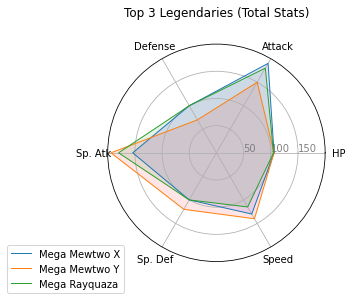

In [15]:
ax = plt.subplot(111, polar=True)

# Evenly divide the plot for each variable
categories = list(big_3)[1:]
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Draw each axis and add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(
    range(50, 200, 50),
    [str(i) for i in range(50, 200, 50)],
    color="grey",
    size=10
)
plt.ylim(0, 200)
 
# Plot for each legendary
for (i, colour) in zip(range(len(big_3.index)), ['b', 'r', 'g']):
    values = big_3.loc[i].drop('Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=big_3["Name"][i])
    ax.fill(angles, values, colour, alpha=0.1)

# Set legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Top 3 Legendaries (Total Stats)", y=1.1)

plt.show()